<a href="https://colab.research.google.com/github/kaansen97/Image-Classification/blob/main/Cat_Dog_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [ ]:
train_path='/content/drive/MyDrive/Datasetler/Cat_Dog/training_set'
test_path='/content/drive/MyDrive/Datasetler/Cat_Dog/test_set'

In [ ]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['cats', 'dogs'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['cats', 'dogs'], batch_size=10, shuffle=False)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [ ]:
imgs, labels = next(train_batches)

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

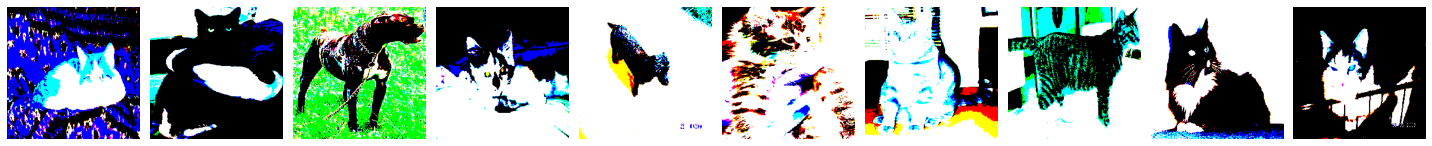

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
plotImages(imgs)
print(labels)

In [ ]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 2)                 4

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x=train_batches, epochs=5, verbose=2)

Epoch 1/5
801/801 - 856s - loss: 0.9166 - accuracy: 0.7227 - 856s/epoch - 1s/step
Epoch 2/5
801/801 - 539s - loss: 0.2260 - accuracy: 0.9123 - 539s/epoch - 673ms/step
Epoch 3/5
801/801 - 542s - loss: 0.0726 - accuracy: 0.9804 - 542s/epoch - 676ms/step
Epoch 4/5
801/801 - 541s - loss: 0.0197 - accuracy: 0.9986 - 541s/epoch - 675ms/step
Epoch 5/5
801/801 - 541s - loss: 0.0379 - accuracy: 0.9904 - 541s/epoch - 675ms/step


In [ ]:
model.summary()

In [ ]:
model.save("Cat_Dog_Court_Model.h5py")

INFO:tensorflow:Assets written to: Cat_Dog_Court_Model.h5py/assets


In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/modeldogcatEpochs5..h5py')

# Check its architecture
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 200704)            0         
                                                                 
 dense_2 (Dense)             (None, 2)                

In [ ]:
predictions=model.predict(x=test_batches,verbose=0)

In [ ]:
activations=predictions

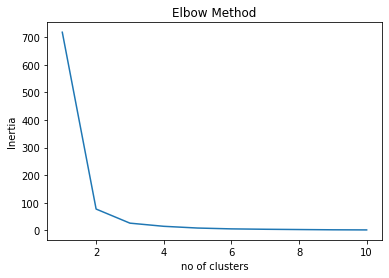

In [ ]:
import matplotlib.pyplot as plt
#%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans
clusters=[]
layer_activation=activations
for i in range (1,11):# 10 kume istiyoruz her birini denesin
  kmeans = KMeans(n_clusters=i, init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = 0)
  pred_y=kmeans.fit_predict(layer_activation)
  clusters.append(kmeans.inertia_)#burdaki inertia veri noktalarini kumelere ayirmak icin kullanilan formul

plt.plot(range(1,11),clusters)
plt.title('Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('Inertia')
plt.show()

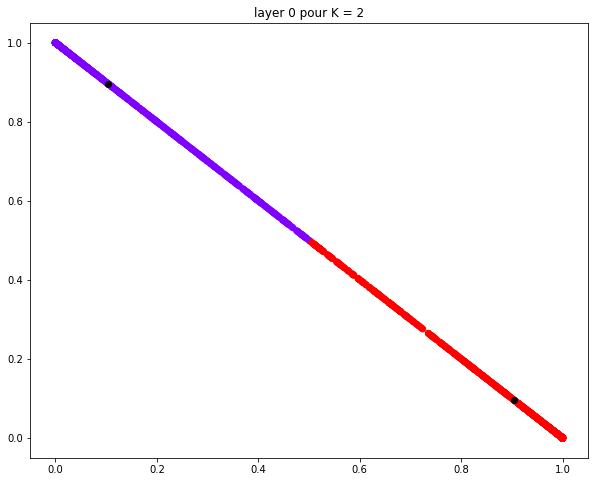

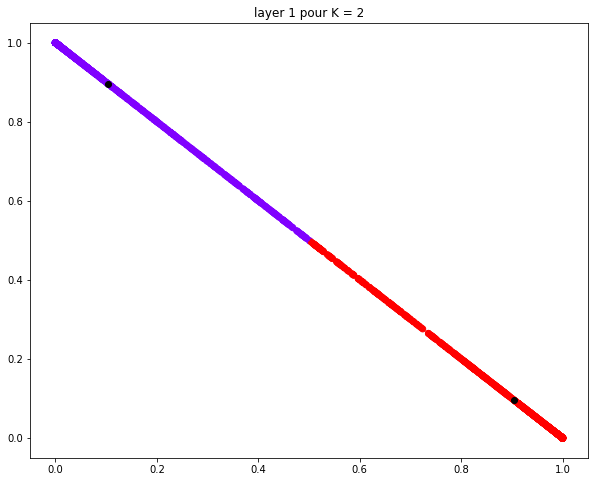

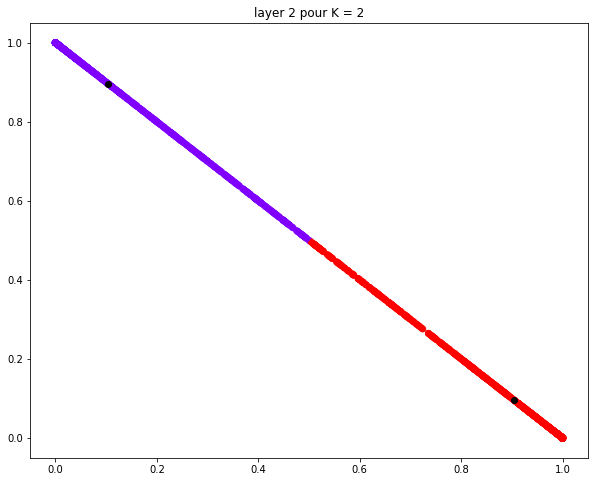

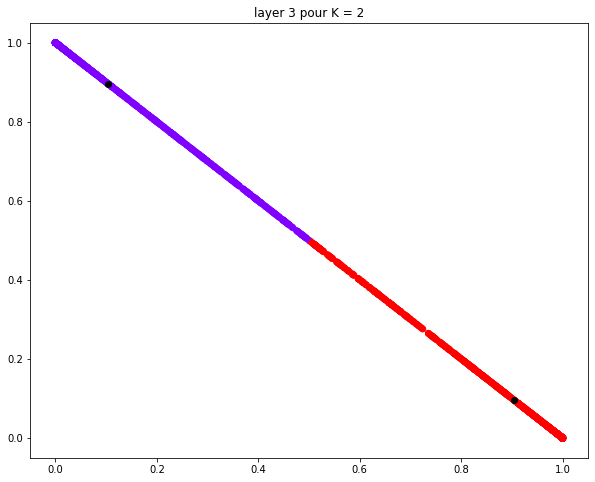

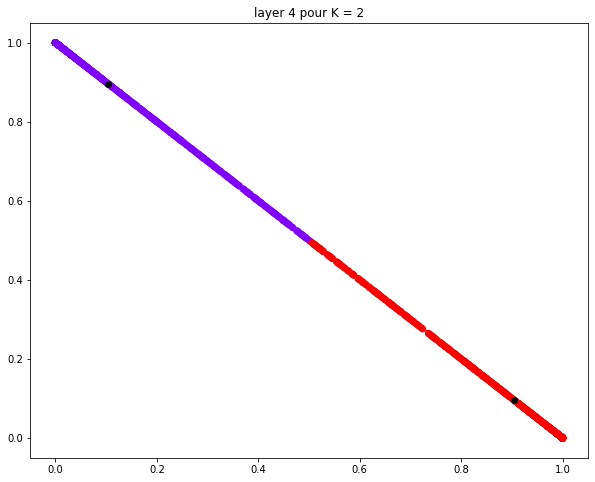

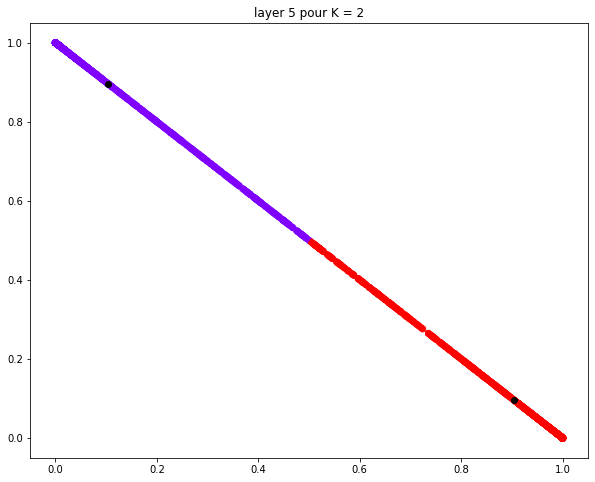

In [ ]:
import matplotlib.pyplot as plt
#%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans

nb_clusters=2
for i in range (0,len(model.layers)):
    layer_activation=activations
    kmeans = KMeans(n_clusters=nb_clusters, init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = 0)
    pred_y=kmeans.fit_predict(layer_activation)
    plt.figure(figsize=(10,8))
    titre='layer '+str(i)+ " pour K = "+str(nb_clusters)
    plt.title(titre)
    plt.scatter(layer_activation[:,0], layer_activation[:,1], c=kmeans.labels_, cmap='rainbow')
    plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
    plt.show()

In [ ]:
%%capture
%pip install bokeh

In [ ]:
from bokeh.io import output_notebook, show
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure
import bokeh.plotting
bokeh.plotting.output_notebook()

In [ ]:
nb_clusters=2
for i in range (0,len(model.layers)):
    layer_activation=activations
    kmeans = KMeans(n_clusters=nb_clusters, init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = 0)
    pred_y=kmeans.fit_predict(layer_activation)



In [ ]:
# define hover tool
from bokeh.models import HoverTool
hover = HoverTool(
    # we print the class label 
    # and the index in the dataframe
    # in the tooltip
    tooltips = [('label','@label'),
               ('index', '$index')]
)


# initialize our bokeh plot
plot = figure(tools=[hover,'box_zoom','crosshair','undo'], width=500, height=500, title='Cat or Dog', x_axis_label = "longueur pelage", y_axis_label = "longueur griffes")

# plot centroid / cluster center / group mean for each group
clus_xs = []
clus_ys = []

#we get the  cluster x / y values from the k-means algorithm
for entry in kmeans.cluster_centers_:
   clus_xs.append(entry[0])
   clus_ys.append(entry[1])

# the cluster center is marked by a circle, with a cross in it
plot.circle_cross(x=clus_xs, y=clus_ys, size=10, fill_alpha=0, line_width=2, color=['black', 'black', 'black'])
plot.text(text = ['chat', 'chien'], x=clus_xs, y=clus_ys, text_font_size='30pt')

GlyphRenderer(id='74163', ...)

In [ ]:
i=0
for sample in layer_activation[:]:
  if( kmeans.labels_[i]==0):
    plot.circle(x=sample[0],y=sample[1],size=5,color="red")
  if( kmeans.labels_[i]==1):
    plot.circle(x=sample[0],y=sample[1],size=5,color="green")
  i+=1

bokeh.plotting.show(plot)


